## Setup

We'll use the mpg dataset and predict whether a car has automatic or manual transmission.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
mpg = pydataset.data('mpg')
mpg.trans = np.where(mpg.trans.str.startswith('auto'), 'auto', 'manual')

In [3]:
X, y = mpg[['displ', 'cyl', 'cty', 'hwy']], mpg.trans

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## `.cross_val_score`

In [6]:
clf = DecisionTreeClassifier(max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.6114285714285714

In [9]:
# TODO: loop through various depths and plot accuracy against depth
for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    print(f'{depth:2} | {score:.3f}')

 1 | 0.617
 2 | 0.583
 3 | 0.600
 4 | 0.611
 5 | 0.617
 6 | 0.669
 7 | 0.640
 8 | 0.629
 9 | 0.634
10 | 0.634


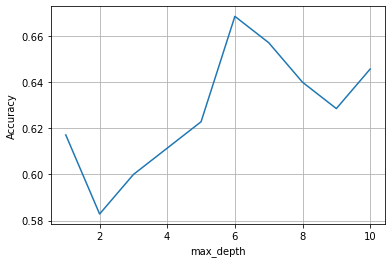

In [14]:
# TODO: loop through various depths and plot accuracy against depth
scores = {}
for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    scores[depth] = score
    
pd.Series(scores).plot()
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.grid()

In [18]:
y_train.head()

180    manual
222    manual
225      auto
131      auto
137      auto
Name: trans, dtype: object

In [20]:
# TODO: use a metric other than accuracy
from sklearn.metrics import precision_score, make_scorer

clf = DecisionTreeClassifier(max_depth=4)
# pos_label = manual is necessary because our y is not 1s and 0s
cross_val_score(clf, X_train, y_train, cv=5, scoring=make_scorer(precision_score, pos_label='manual')).mean()

0.46333333333333326

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


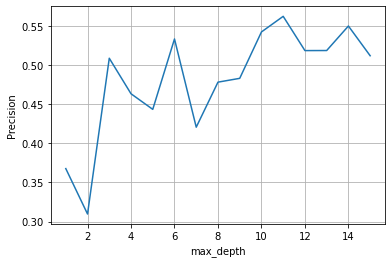

In [26]:
def evaluate_dtree(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    scorer_function = make_scorer(precision_score, pos_label='manual')
    return cross_val_score(clf, X_train, y_train, cv=5, scoring=scorer_function).mean()

pd.Series({depth: evaluate_dtree(depth) for depth in range(1, 16)}).plot()
plt.ylabel('Precision')
plt.xlabel('max_depth')
plt.grid()

## Grid Search

In [37]:
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, {'n_neighbors': range(1, 21)}, cv=5)

In [40]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [29]:
grid.cv_results_['mean_test_score']

array([0.59428571, 0.62857143, 0.60571429, 0.62857143, 0.61142857,
       0.61142857, 0.57142857, 0.62285714, 0.6       , 0.64      ,
       0.62285714, 0.65142857, 0.62857143, 0.62285714, 0.64      ,
       0.64      , 0.65142857, 0.63428571, 0.61714286, 0.64      ])

In [30]:
grid.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

In [32]:
# TODO: look at the best score, params
grid.best_score_, grid.best_params_

(0.6514285714285715, {'n_neighbors': 12})

In [36]:
# TODO: get the best model
grid.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [42]:
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 11)}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 11)})

In [45]:
results = pd.DataFrame(grid.cv_results_['params'])
results['score'] = grid.cv_results_['mean_test_score']

In [48]:
results.sort_values(by='score').tail(30)

,max_depth,min_samples_leaf,score
28,3,9,0.639216
30,4,1,0.639542
41,5,2,0.643791
54,6,5,0.643791
42,5,3,0.644444
191,20,2,0.644444
101,11,2,0.644444
151,16,2,0.644771
67,7,8,0.644771
57,6,8,0.644771


## So what now?

**tl;dr** you can take the best performing hyperparms and create a model with them and fit it on your whole test dataset.

caveat: technically this is a different model that the ones' whose performance we measured.

In [57]:
# For more fine-grained control over the results of cross validation, including individual models
cross_validate(clf, X_train, y_train, cv=5, return_estimator=True)

{'fit_time': array([0.00590014, 0.0070672 , 0.00427294, 0.00395274, 0.00201607]),
 'score_time': array([0.00340676, 0.00275564, 0.00203013, 0.00191116, 0.00157809]),
 'estimator': [DecisionTreeClassifier(max_depth=12),
  DecisionTreeClassifier(max_depth=12),
  DecisionTreeClassifier(max_depth=12),
  DecisionTreeClassifier(max_depth=12),
  DecisionTreeClassifier(max_depth=12)],
 'test_score': array([0.6       , 0.82857143, 0.62857143, 0.54285714, 0.62857143])}

In [55]:
clf = DecisionTreeClassifier(max_depth=12, min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [56]:
clf.score(X_test, y_test)

0.6949152542372882

## Exercise

1. Use the cross validation techniques described in the lesson to find the best model for predicting transmission type with the mpg dataset.
1. Use cross validation techniques to determine the best model for predicting survival with the titanic dataset.
1. Use cross validation techniques to determine the best model for predicting tip amount with the tips dataset.